<a href="https://colab.research.google.com/github/Mohammed-Aasim-9988/Assignments_DS/blob/main/TEXT_MINING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import warnings
warnings.filterwarnings('ignore')

Multi-page web-scraping

In [3]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

Looping through multiple pages

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_1_sspa?crid=2HVOII48XJCQ3&dib=eyJ2IjoiMSJ9.BYNFvwtH22P9KpMcF9vMKc6PyypdtJ1y2plBWAfMXOteWuYlMLMxSjGUc8YBmy0IYuhIBRcn1JBLLPLxpFBk0rJLumTjesqr4dJcAHwT_-6LCrwhc_Sm-mwRu9vhcWNlmiy_QS_bUZqyutrM1bfcoeKvI-aF0mgk6oJfw_53nUhK9XM7GjgJ9Mqc30dJrOkcNTfHZYgBst2qFQF7GnhdN6OnzXtcBv3kUxUKgk0jhF8.CjXRB8xIB4VehtHXpE93l3CT-zj8i93GJUN7OEkkKRE&dib_tag=se&keywords=boat%2Bxtend%2Bpro&qid=1714736449&sprefix=boat%2Bxtend%2Bpro%2Caps%2C276&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

Save results to a Dataframe, then export as CSV

In [7]:
df = pd.DataFrame(reviewlist)
df


,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,Reviewed in India on 27 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",Reviewed in India on 10 December 2023
2,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",Reviewed in India on 17 April 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
4,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,Reviewed in India on 27 April 2024
...,...,...,...,...
79,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
80,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,Reviewed in India on 27 April 2024
81,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",Reviewed in India on 10 December 2023
82,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",Reviewed in India on 17 April 2024


In [8]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [9]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",17 April 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
5,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
6,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",17 April 2024
7,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
8,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
9,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023


In [10]:
df.to_csv("BoatSmartWatch_Review.csv")

Load Dataset

In [11]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",17 April 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
...,...,...,...,...
79,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
80,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
81,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
82,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",17 April 2024


Data Exploration

In [12]:
reviews.Rating.describe()

count    84.000000
mean      4.750000
std       0.435613
min       4.000000
25%       4.750000
50%       5.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        84 non-null     object 
 1   Rating       84 non-null     float64
 2   Review       84 non-null     object 
 3   Review_Date  84 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [14]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [15]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024
1,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
2,5.0 out of 5 stars\nVery good product,5.0,"Good look watch, 8 days battery backup, light ...",17 April 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,5.0 out of 5 stars\nOVERALL QUALITY,5.0,The build quality of this watch is really good...,27 April 2024


Data Visualization

Date vs Review Count

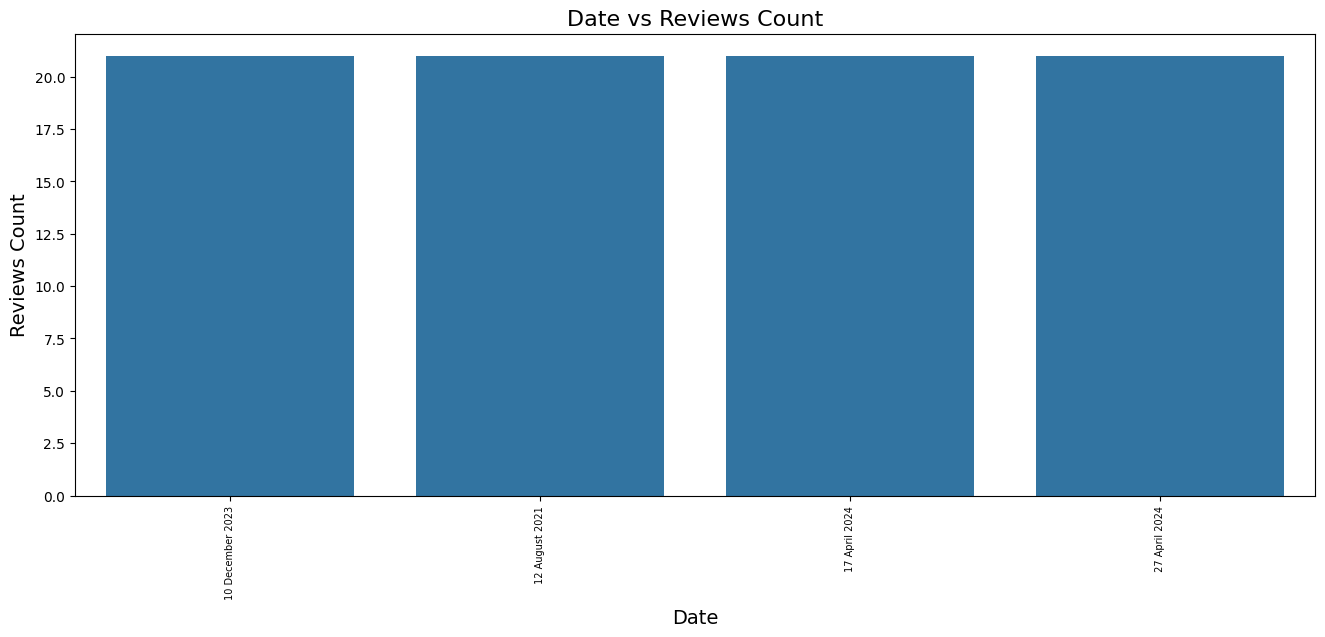

In [16]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

Percentage of Ratings

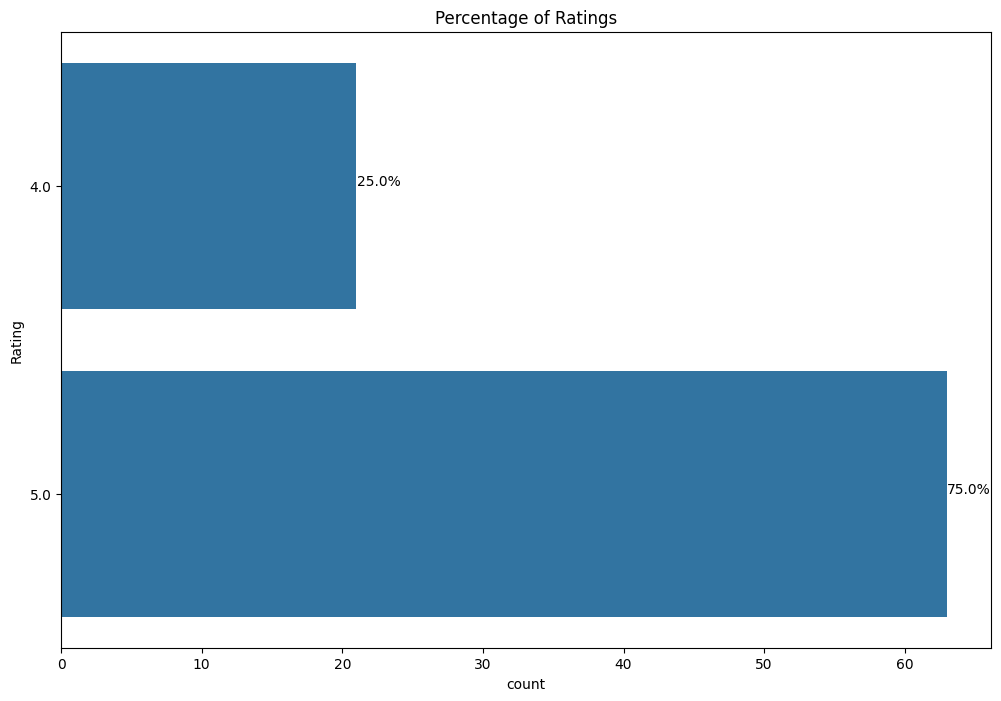

In [17]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

BasicText Preprocessing for Sentiment Analysis

Spelling Correction

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The build quality of this watch is really good...
1    Drawback•Met's know this first, which is not m...
2    Good look watch, 8 days battery back, light we...
3    The media could not be loaded.\n              ...
4    The build quality of this watch is really good...
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

,Review
0,The build quality of this watch is really good...
1,"Drawbacks•Let's know this first, which is not ..."
2,"Good look watch, 8 days battery backup, light ..."
3,The media could not be loaded.\n ...
4,The build quality of this watch is really good...
...,...
79,The media could not be loaded.\n ...
80,The build quality of this watch is really good...
81,"Drawbacks•Let's know this first, which is not ..."
82,"Good look watch, 8 days battery backup, light ..."


Resetting index

In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x.lower() not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatizer

In [22]:
!pip install nltk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/84 [00:00<?, ?it/s]

In [24]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
4,build quality watch really good really give pr...,build quality watch really good. really gives ...


Text Pre-processing Techniques

Removing '@names


In [25]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [26]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
4,build quality watch really good really give pr...,build quality watch really good. really gives ...
5,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
6,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
7,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
8,build quality watch really good really give pr...,build quality watch really good. really gives ...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


Removing links (http | https)

In [27]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
4,build quality watch really good really give pr...,build quality watch really good. really gives ...
5,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
6,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
7,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
8,build quality watch really good really give pr...,build quality watch really good. really gives ...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


Removing Review with empty text

In [28]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
4,build quality watch really good really give pr...,build quality watch really good. really gives ...
5,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
6,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
7,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
8,build quality watch really good really give pr...,build quality watch really good. really gives ...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


Dropping duplicate rows

In [29]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
4,build quality watch really good really give pr...,build quality watch really good. really gives ...
5,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
6,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
7,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
8,build quality watch really good really give pr...,build quality watch really good. really gives ...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


Function to remove emoji

In [30]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [31]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
4,build quality watch really good really give pr...,build quality watch really good. really gives ...
5,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
6,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ..."
7,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
8,build quality watch really good really give pr...,build quality watch really good. really gives ...
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."


Tokenize 'Clean_Reviews'

In [32]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [33]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['drawback', 'let', 'know', 'first', 'much', 'st', 'delivery', 'late', 'almost', 'month', 'ordering', 'product', 'guess', 'may', 'due', 'great', 'sale', 'offer', 'going', 'time', 'second', 'problem', 'watch', 'battery', 'life', 'mentioned', 'description', 'go', 'day', 'right', 'continue', 'day', 'actually', 'use', 'see', 'time', 'use', 'apps', 'feature', 'much', 'otherwise', 'hardly', 'live', 'day', 'beginning', 'benefitsnow', 'main', 'part', 'st', 'though', 'delivery', 'late', 'good', 'well', 'protected', 'secondly', 'featuresthis', 'boat', 'xtend', 'smartwatch', 'really', 'good', 'handy', 'tech', 'savvy', 'person', 'download', 'boat', 'wave', 'app', 'connect', 'device', 'bluetooth', 'better', 'app', 'set', 'personalize', 'everything', 'app', 'health', 'data', 'almost', 'accurate', 'keep', 'track', 'well', 'well', 'includes', 'step', 'count', 'calorie', 'burn', 'stress', 'level', 'bp', 'oxygen', 'level', 'even', 'menstruation', 'cycle', 'give', 'weekly', 'health', 'report', '

In [34]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [build, quality, watch, really, good, really, ...
1    [drawback, let, know, first, much, st, deliver...
2    [good, look, watch, day, battery, backup, ligh...
3    [medium, could, loaded, used, watch, month, bo...
4    [build, quality, watch, really, good, really, ...
5    [drawback, let, know, first, much, st, deliver...
6    [good, look, watch, day, battery, backup, ligh...
7    [medium, could, loaded, used, watch, month, bo...
8    [build, quality, watch, really, good, really, ...
9    [drawback, let, know, first, much, st, deliver...
Name: Clean_Reviews, dtype: object

In [35]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ..."
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ...","[good, look, watch, day, battery, backup, ligh..."
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo..."
4,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ..."
5,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."
6,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ...","[good, look, watch, day, battery, backup, ligh..."
7,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo..."
8,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ..."
9,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."


 Converting words to Stemmer

In [36]:
stemmer = SnowballStemmer("english")

In [37]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,build qualiti watch realli good realli give pr...
1,drawback let know first much st deliveri late ...
2,good look watch day batteri backup light weigh...
3,medium could load use watch month bought first...
4,build qualiti watch realli good realli give pr...
...,...
79,medium could load use watch month bought first...
80,build qualiti watch realli good realli give pr...
81,drawback let know first much st deliveri late ...
82,good look watch day batteri backup light weigh...


Converting words to Lemma

In [38]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,build quality watch really good really give pr...
1,drawback let know first much st delivery late ...
2,good look watch day battery backup light weigh...
3,medium could loaded used watch month bought fi...
4,build quality watch really good really give pr...
...,...
79,medium could loaded used watch month bought fi...
80,build quality watch really good really give pr...
81,drawback let know first much st delivery late ...
82,good look watch day battery backup light weigh...


Basic Feature Extaction

In [39]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [40]:
!pip install --upgrade scikit-learn

CountVectorizer with N-grams (Bigrams & Trigrams)

In [43]:
dataframe = dataframe.reset_index(drop=True)

In [44]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/84 [00:00<?, ?it/s]

In [45]:
corpus[3]

'medium could load use watch month bought first sale keep read unbias review tip trick ensur function watch work smoothli larg curv display price categori inch batteri heavi usag frequent wake screen alexa alarm notif day standbi check time occassion day pretti good full charg time hour decent qualiti magnet charg cabl provid use low power adapt power bank laptop necessari health workout track option spo oxymet heart rate monitor accuraci sleep track pretti accur paedomet accur time sometim hundr step ad randomli without activ happen randomli day stress monitor also sure calcul sensor fake probabl watch contact skin display warn messag display data lift wake gestur work second delay manag tap wake function work popular notif whatsapp sm facebook instagram etc read entir sm watch messag unless long call pick silenc see caller id reject call bt music control weather updat alexa usabl smart featur differ watch face avail boat wave app realli good also customis wallpap watch face see post 

Applying Countvectorizer (Creating the Bag of Words model)

In [46]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [47]:

X.shape

(84, 1546)

In [51]:
# Update scikit-learn
!pip install --upgrade scikit-learn

# Remove the get_feature_names_out keyword argument
count_vectorizer = CountVectorizer(max_features=1546, ngram_range=(1, 3))
X = count_vectorizer.fit_transform(corpus).toarray()

# Get the feature names
feature_names = count_vectorizer.get_feature_names_out()[:20]

# Print the feature names
print(feature_names)

['ac' 'ac work' 'ac work simpl' 'accident' 'accident clear'
 'accident clear cach' 'account' 'account download'
 'account download alexa' 'accur' 'accur alexa' 'accur alexa work'
 'accur keep' 'accur keep track' 'accur paedomet' 'accur paedomet accur'
 'accur time' 'accur time sometim' 'accuraci' 'accuraci sleep']


In [52]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

F-IDF Vectorizer

In [56]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/84 [00:00<?, ?it/s]

In [57]:
corpus[4]

'build qualiti watch realli good realli give premium feel wear ad look also cool watch easili defin price read'

Applying TF-IDF Vectorizer

In [58]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [59]:
X.shape

(84, 1546)

In [65]:
vocabulary_list = list(tfidf_v.vocabulary_)
print(vocabulary_list[:20])

['build', 'qualiti', 'watch', 'realli', 'good', 'give', 'premium', 'feel', 'wear', 'ad', 'look', 'also', 'cool', 'easili', 'defin', 'price', 'read', 'build qualiti', 'qualiti watch', 'watch realli']


In [66]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [70]:
# Use the `vocabulary_` attribute to access the names of the features.
feature_names = tfidf_v.vocabulary_.keys()

# Create a DataFrame using the feature names.
count_df = pd.DataFrame(X, columns=feature_names)
count_df

,build,qualiti,watch,realli,good,give,premium,feel,wear,ad,...,handi dark remot,dark remot shutter,remot shutter button,shutter button camera,button camera call,camera call silenc,call silenc option,silenc option could,option could ad,could ad read
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032734,...,0.000000,0.000000,0.000000,0.032734,0.045781,0.045781,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.047996,...,0.022375,0.022375,0.022375,0.015999,0.000000,0.000000,0.022375,0.022375,0.022375,0.022375
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.022375,0.047996,...,0.022375,0.022375,0.022375,0.015999,0.000000,0.000000,0.022375,0.022375,0.022375,0.022375
80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
81,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032734,...,0.000000,0.000000,0.000000,0.032734,0.045781,0.045781,0.000000,0.000000,0.000000,0.000000
82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Named Entity Recognition (NER)

In [71]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'build quality watch really good really give premium feeling wearing adding look also cool watch easily defines price read drawback let know first much st delivery late almost month ordering product guess may due great sale offer going time second problem watch battery life mentioned description go day right continue day actually use see time use apps feature much otherwise hardly live day beginning benefitsnow main part st though delivery late good well protected secondly featuresthis boat xtend smartwatch really good handy tech savvy person download boat wave app connect device bluetooth better app set personalize everything app health data almost accurate keep track well well includes step count calorie burn stress level bp oxygen level even menstruation cycle give weekly health report breath training feature also available need kind sport activity including cycling swimming hiking rowing cricket etc available found phone flashlight weather forecast music feature phone stopwatch tim

Parts Of Speech (POS) Tagging

In [72]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [73]:
for token in doc_block[:50]:
    print(token,token.pos_)

build VERB
quality NOUN
watch NOUN
really ADV
good ADJ
really ADV
give VERB
premium NOUN
feeling NOUN
wearing VERB
adding VERB
look VERB
also ADV
cool ADJ
watch NOUN
easily ADV
defines VERB
price NOUN
read NOUN
drawback NOUN
let AUX
know VERB
first ADV
much ADV
st PROPN
delivery NOUN
late ADV
almost ADV
month NOUN
ordering VERB
product NOUN
guess NOUN
may AUX
due VERB
great ADJ
sale NOUN
offer NOUN
going VERB
time NOUN
second ADJ
problem NOUN
watch VERB
battery NOUN
life NOUN
mentioned VERB
description NOUN
go VERB
day NOUN
right INTJ
continue VERB


Filtering the nouns and verbs only

In [74]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['using', 'take', 'processing', 'time', 'type', 'wake', 'gesture', 'hand', 'pressing', 'side', 'knob', 'activate', 'get', 'watch', 'calculating', 'math', 'problem', 'translating', 'word', 'language', 'finding', 'quote', 'explore', 'amaze', 'watch', 'face', 'use', 'picture', 'liking', 'read', 'look', 'watch', 'day', 'battery', 'backup', 'light', 'weight', 'watch', 'activity', 'tracker', 'read', 'medium', 'loaded', 'watch', 'month', 'bought', 'sale', 'keep', 'reading', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'display', 'price', 'category', 'inch', 'battery', 'usage', 'waking', 'screen', 'alarm', 'notification', 'day', 'checking', 'time', 'day', 'charging', 'time', 'hour', 'quality', 'charging', 'cable', 'provided', 'use', 'power', 'laptop', 'health', 'workout', 'tracking', 'option', 'spo', 'accuracy', 'sleep', 'tracking', 'paedometer', 'time', 'step', 'added', 'activity', 'happens', 'day', 'stress', 'monitor', 'calculated', 'sensor', 'watch']


Counting the noun & verb tokens

In [75]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,420
1,time,210
2,day,168
3,boat,168
4,wave,147
5,app,147
6,phone,147
7,work,147
8,call,147
9,use,126


Visualizing results (Barchart for top 10 nouns + verbs)

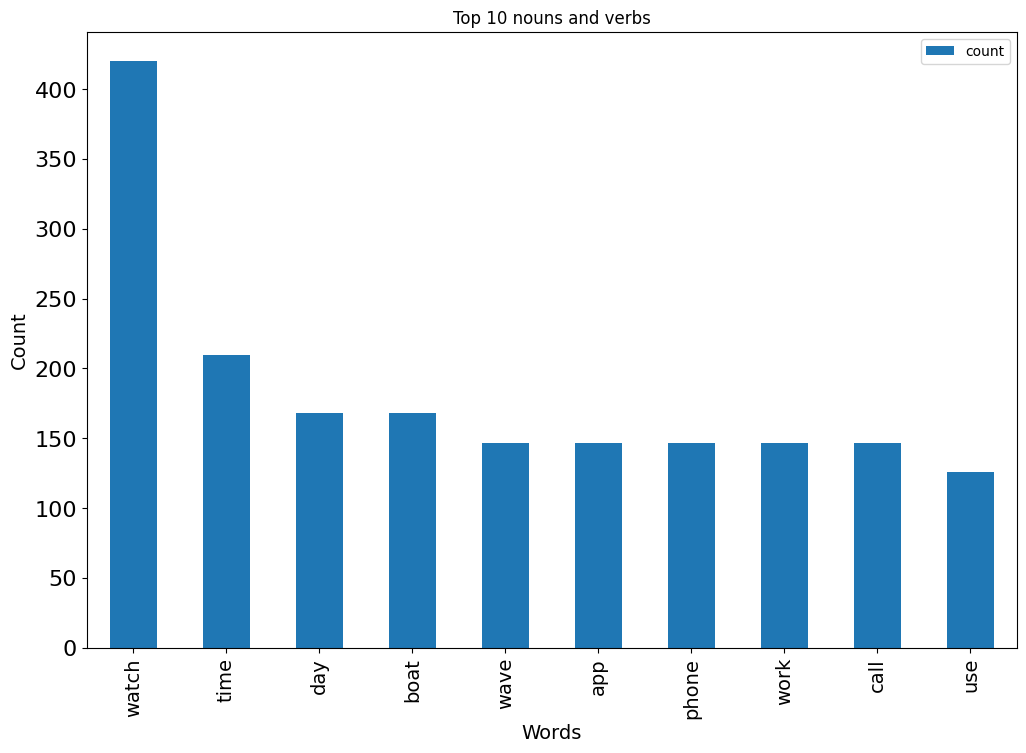

In [76]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Feature Extraction

BOW Features

In [77]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

TF-IDF Features

In [78]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

Fetch sentiments Using TextBlob

In [79]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [80]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,84


Let's calculate subjectivity and Polarity

In [81]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ...",0.570833,0.420833
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ...","[good, look, watch, day, battery, backup, ligh...",0.633333,0.600000
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
4,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ...",0.570833,0.420833


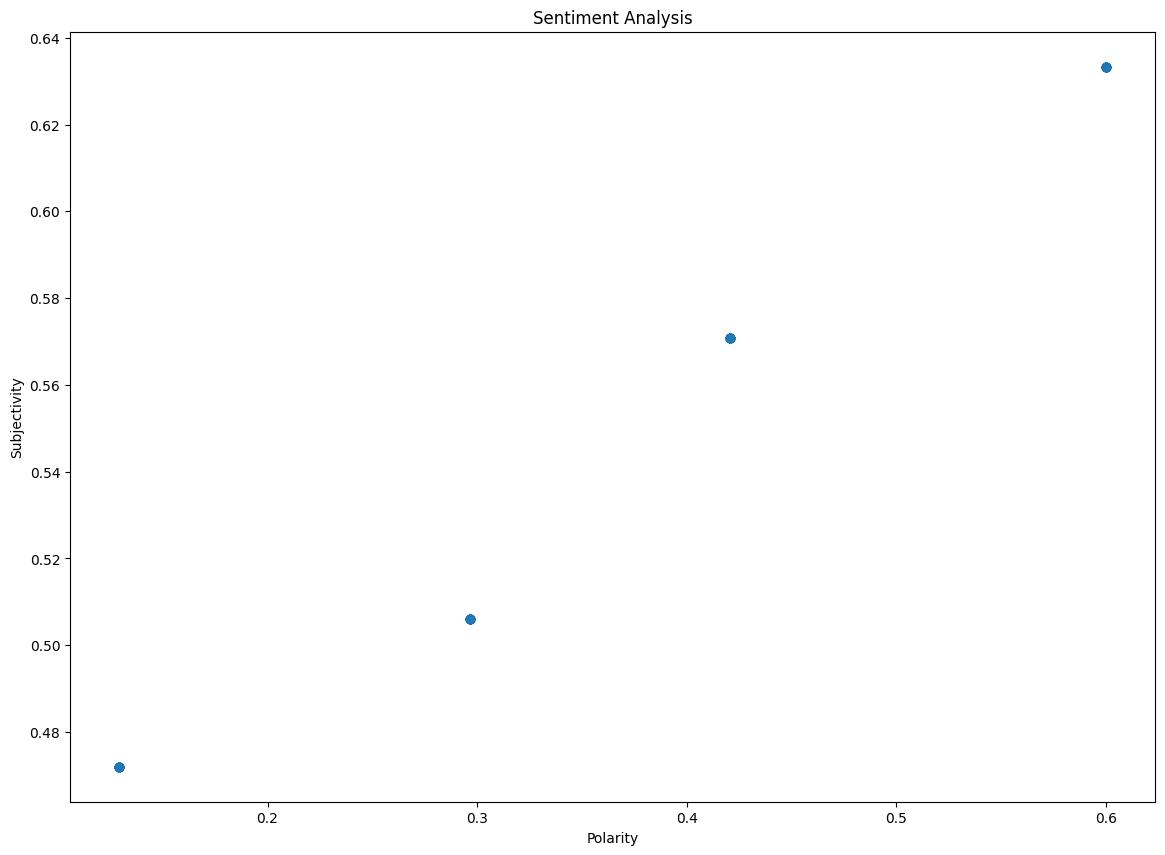

In [82]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [83]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ...",0.570833,0.420833,pos
1,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569,pos
2,good look watch day battery backup light weigh...,"good look watch, 8 days battery backup, light ...","[good, look, watch, day, battery, backup, ligh...",0.633333,0.600000,pos
3,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
4,build quality watch really good really give pr...,build quality watch really good. really gives ...,"[build, quality, watch, really, good, really, ...",0.570833,0.420833,pos


Story Generation and Visualization

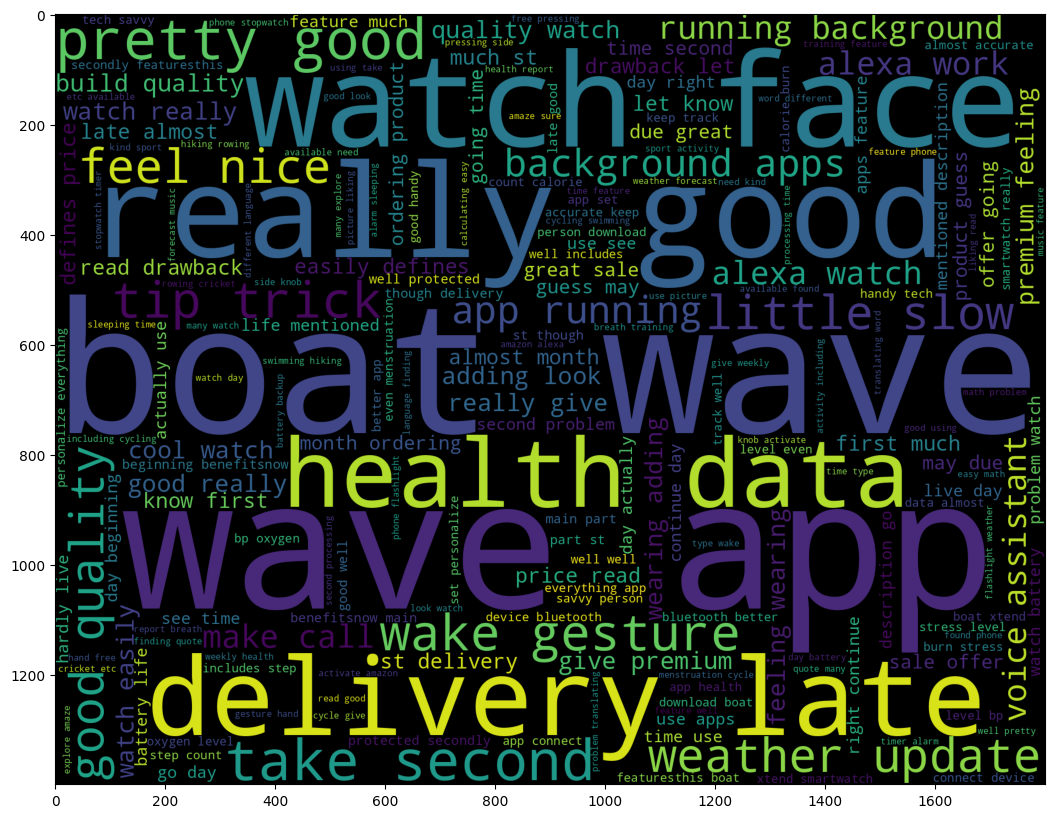

In [84]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

Most common words in positive Review

In [85]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

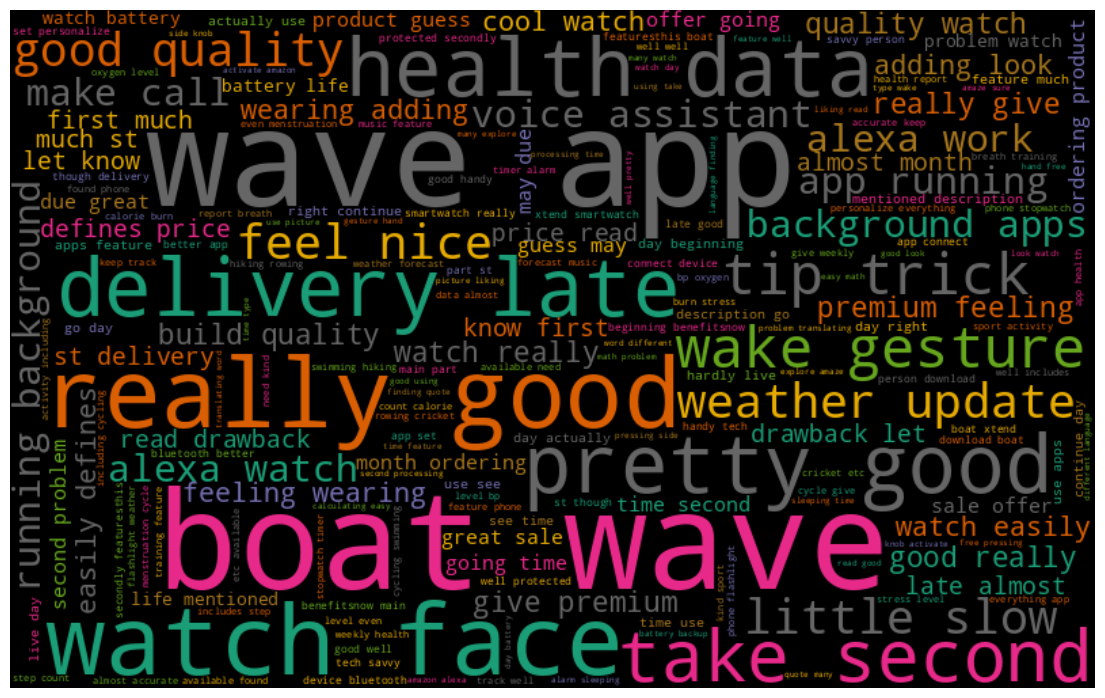

In [86]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# **THE END**